In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import *
import math as m
from scipy.optimize import brent
import scipy.special as sp

## Finding roots in 1-D

In [2]:
alpha=10

In [3]:
def func_left(x):
    return np.tan(x)

In [4]:
def func_right(x):
    alpha =10
    return np.sqrt(np.pi*alpha-x)

In [5]:
xval= np.linspace(-2*np.pi,2*np.pi,100)
yval_left=func_left(xval)
yval_right=func_right(xval)

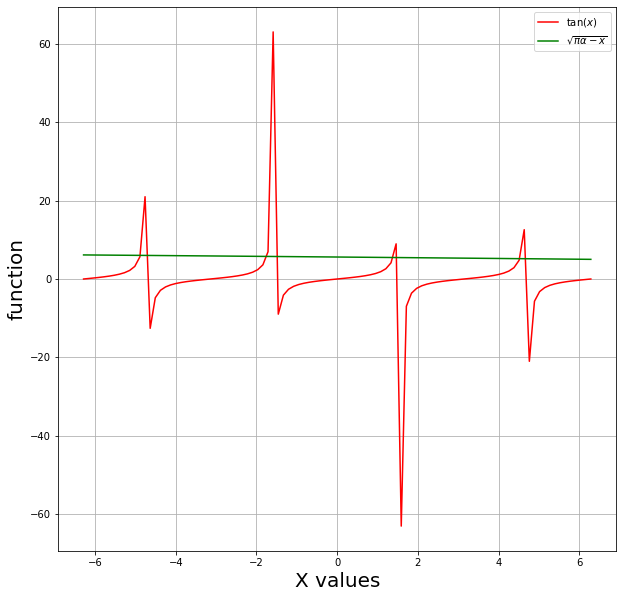

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.grid(True)
plt.plot(xval,yval_left,label=r'$\tan(x)$',c='r')
plt.plot(xval,yval_right,label=r'$\sqrt{\pi \alpha-x}$',c='g')
plt.legend()
ax.set_xlabel("X values",fontsize=20)
ax.set_ylabel("function",fontsize=20)
plt.rcParams['legend.fontsize'] = 15
#plt.plot(xval,yval_left-yval_right,'m')


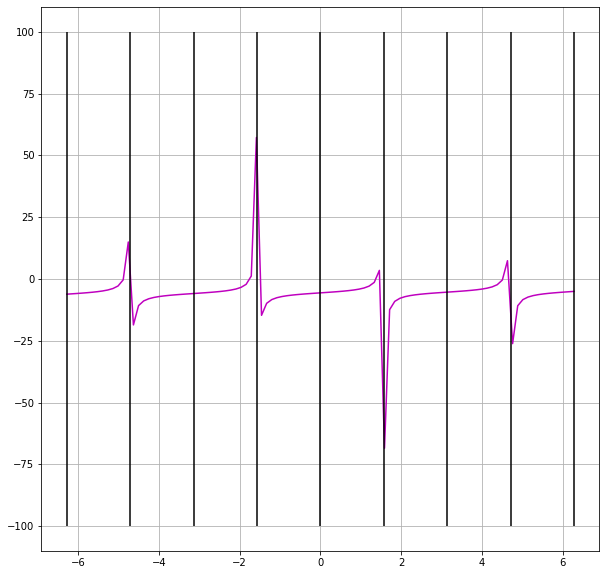

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.grid(True)
plt.plot(xval,yval_left-yval_right,'m')
plt.vlines(0,100,-100,'k')
plt.vlines(-np.pi/2,100,-100,'k')
plt.vlines(-np.pi,100,-100,'k')
plt.vlines(-3*np.pi/2,100,-100,'k')
plt.vlines(np.pi/2,100,-100,'k')
plt.vlines(np.pi,100,-100,'k')
plt.vlines(3*np.pi/2,100,-100,'k')
plt.vlines(2*np.pi,100,-100,'k')
plt.vlines(-2*np.pi,100,-100,'k')
#plt.vlines(-3*np.pi/2,100,-100,'b')

### Bracketing regions: ..$\left(-\pi,\frac{-\pi}{2}\right)$ , $\left(\frac{-\pi}{2},0\right)$, $\left(0,\frac{\pi}{2}\right)$ , $\left(\pi,\frac{3\pi}{2}\right)$ and so on 

In [8]:

n=1 # Storing the number of function calls for bisection
def func(x):
    return np.tan(x)-np.sqrt(np.pi*alpha-x)

In [9]:
def bisection(func,a,b,tol,n):
    assert func(a)*func(b)<0
    c=(a+b)/2
    n=n+1
    if(func(c)==0 or (b-a)/2<tol):
        return c,n
    elif (np.sign(func(a))==np.sign(func(c))):
        return bisection(func,c,b,tol,n)
    else:
        return  bisection(func,a,c,tol,n)
        

In [10]:
zero_bisection,n_bisection=bisection(func,0,np.pi/2,10**(-6),n)

In [36]:
zero_bisection,n_bisection

(1.3902861862001332, 22)

In [12]:
#Code from Nick Ryan's blog
#https://nickcdryan.com/2017/09/13/root-finding-algorithms-in-python-line-search-bisection-secant-newton-raphson-boydens-inverse-quadratic-interpolation-brents/

def brents(f, x0, x1, max_iter=50, tolerance=1e-6):
 
    fx0 = f(x0)
    fx1 = f(x1)
 
    assert (fx0 * fx1) <= 0, "Root not bracketed" 
 
    if abs(fx0) < abs(fx1):
        x0, x1 = x1, x0
        fx0, fx1 = fx1, fx0
 
    x2, fx2 = x0, fx0
 
    mflag = True
    steps_taken = 0
 
    while steps_taken < max_iter and abs(x1-x0) > tolerance:
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)
 
        if fx0 != fx2 and fx1 != fx2:
            L0 = (x0 * fx1 * fx2) / ((fx0 - fx1) * (fx0 - fx2)) #Inverse Quadratic Interpolation
            L1 = (x1 * fx0 * fx2) / ((fx1 - fx0) * (fx1 - fx2))
            L2 = (x2 * fx1 * fx0) / ((fx2 - fx0) * (fx2 - fx1))
            new = L0 + L1 + L2
 
        else:
            new = x1 - ( (fx1 * (x1 - x0)) / (fx1 - fx0) )
 
        if ((new < ((3 * x0 + x1) / 4) or new > x1) or
            (mflag == True and (abs(new - x1)) >= (abs(x1 - x2) / 2)) or
            (mflag == False and (abs(new - x1)) >= (abs(x2 - d) / 2)) or
            (mflag == True and (abs(x1 - x2)) < tolerance) or
            (mflag == False and (abs(x2 - d)) < tolerance)):
            new = (x0 + x1) / 2
            mflag = True
 
        else:
            mflag = False
 
        fnew = f(new)
        d, x2 = x2, x1
 
        if (fx0 * fnew) < 0:
            x1 = new
        else:
            x0 = new
 
        if abs(fx0) < abs(fx1):
            x0, x1 = x1, x0
 
        steps_taken += 1
 
    return x1, steps_taken

In [13]:
_,n_brents=brents(func,0,np.pi/2)

In [14]:
def discrete_method_approx(f, x, h=.00000001):
    return (f(x+h) - f(x)) / h
 
def newton_raphson(f, x, tolerance):
    steps_taken = 0
 
    while abs(f(x)) > tolerance:
        df = discrete_method_approx(f,x)
        x = x - f(x)/df
        steps_taken += 1
    return x, steps_taken

In [15]:
_,n_newton=newton_raphson(func,1,0.00001)

In [16]:
print("The number of functions calls for Bisection, Newton and Brent's respectively:")
n_bisection,n_newton,n_brents

The number of functions calls for Bisection, Newton and Brent's respectively:


(22, 14, 11)

## Minimization in 1-D

In [17]:
def func_1D(x):
    return np.sin(x) + 1/(1+np.power(x,2))


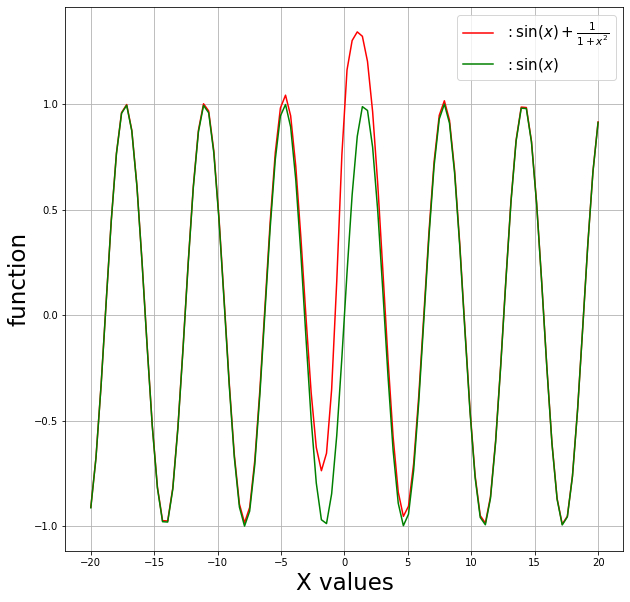

In [18]:
xval= np.linspace(-20,20,100)
yval=func_1D(xval)
fig, ax = plt.subplots(figsize=(10, 10))
plt.grid(True)
plt.plot(xval,yval,label=r'$:\sin(x)+\frac{1}{1+x^2}$',c='r')
plt.plot(xval,np.sin(xval),label=r'$:\sin(x)$',c='g')
plt.legend()
ax.set_xlabel("X values",fontsize=23)
ax.set_ylabel("function",fontsize=23)
plt.rcParams['legend.fontsize'] = 15

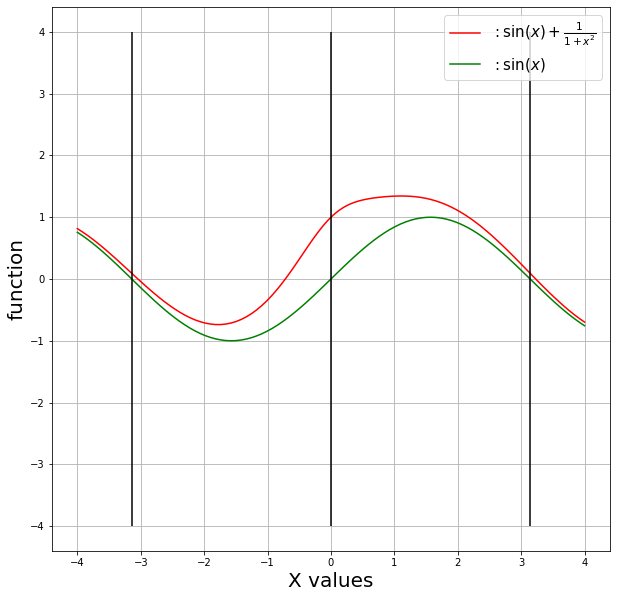

In [19]:
xval= np.linspace(-4,4,100)
yval=func_1D(xval)
fig, ax = plt.subplots(figsize=(10, 10))
plt.grid(True)
plt.plot(xval,yval,label=r'$:\sin(x)+\frac{1}{1+x^2}$',c='r')
plt.plot(xval,np.sin(xval),label=r'$:\sin(x)$',c='g')
plt.legend()
plt.vlines(0,4,-4,'k')
plt.vlines(np.pi,4,-4,'k')
plt.vlines(-np.pi,4,-4,'k')
ax.set_xlabel("X values",fontsize=20)
ax.set_ylabel("function",fontsize=20)
plt.rcParams['legend.fontsize'] = 15

In [20]:

def golden(f,xlower, xupper, tol, max_iter):
    count = 0
    while (xupper-xlower)>tol and count<max_iter:
        x_r1 = xupper - 0.61803399*(xupper - xlower)
        x_r2 = xlower + 0.61803399*(xupper - xlower)
        #print(count, xlower, x_r1, x_r2, xupper)
        if f(x_r1) <= f(x_r2):
            xupper = x_r2
            x_r2 = x_r1
            x_r1 = xupper - 0.61803399*(xupper - xlower)
        else:
            xlower = x_r1
            x_r1 = x_r2
            x_r2  = xlower + 0.61803399*(xupper - xlower)
        count = count + 1
    return (x_r1 + x_r2)/2.0, count

In [21]:
_,n_golden_section=golden(func_1D,-np.pi,0,10**(-8),500)

In [22]:
_,_,n_brent,_=brent(func_1D,brack=(-np.pi,0),full_output=1)

In [23]:
n_golden_section,n_brent

(41, 9)

In [24]:
def new_func(x):
    return func_1D(x)+1e-15 # We can use both the + and - sign and for that xval-xval1 will give the dead zone.

In [25]:
#One is supposed to get the roots of func_1D using brents method of root finding

xval,root1=brents(func_1D,0,5,tolerance=10**(-8))

xval1,root2=brents(new_func,0,5,tolerance=10**(-8))

In [26]:
xval-xval1

-1.3322676295501878e-15

In [27]:
def derivative_func_1D(x):
    return np.cos(x)-2*x/((1+x**2)**2)


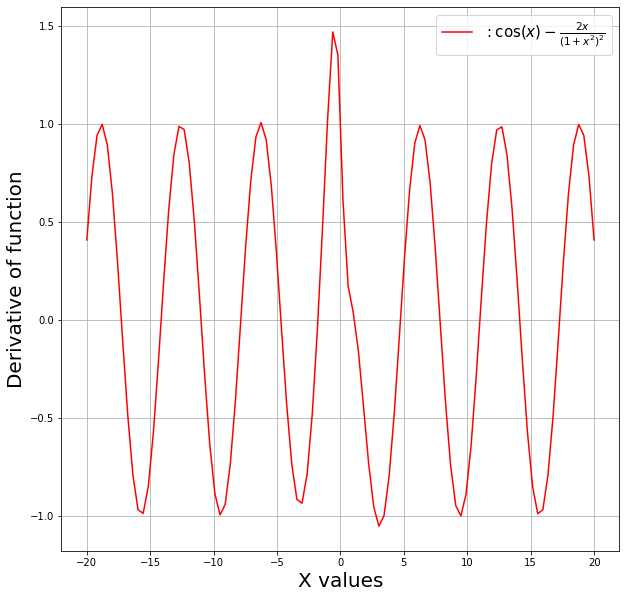

In [28]:
xval= np.linspace(-20,20,100)
yval=derivative_func_1D(xval)
fig, ax = plt.subplots(figsize=(10, 10))
plt.grid(True)
plt.plot(xval,yval,label=r'$:\cos(x)-\frac{2x}{(1+x^2)^2}$',c='r')
#plt.plot(xval,np.sin(xval),label=r'$:\sin(x)$',c='g')
plt.legend()
ax.set_xlabel("X values",fontsize=20)
ax.set_ylabel("Derivative of function",fontsize=20)
plt.rcParams['legend.fontsize'] = 15

In [29]:
#The bracketing region chosen is (0,4) as evident from the above function.
#Applying Bisection on the derivative
n=0
x_bisection,ans_bisection=bisection(derivative_func_1D,-np.pi,0,10**(-8),n)

#Applying Brents on the derivative
x_brent,ans_brents=brents(derivative_func_1D,-np.pi,0)

#Applying Newton-Raphson on the derivative
x_newton,ans_newton=newton_raphson(derivative_func_1D,-1,10**(-8))

In [30]:
ans_bisection,ans_brents,ans_newton ## Bisection takes maximum calls followed by brent and newton

(29, 24, 3)

In [31]:
minlist=[func_1D(x_bisection),func_1D(x_newton),func_1D(x_brent)]

In [32]:
from scipy import optimize

In [33]:
xtrue=optimize.minimize(func_1D,x0=-1)
xtrue.fun # the true value of minima of the function

-0.7382996253794887

In [34]:
acc=[]
for i in range(3):
    acc.append(abs(xtrue.fun-minlist[i]))

In [35]:
acc # We can see that bisection is most accurate followed by brent and newton that follows the same accuracy

[1.1102230246251565e-16, 2.220446049250313e-16, 2.220446049250313e-16]